In [ ]:
import pandas as pd

input_file = 'corpus.txt'
output_file = 'corpus_sorted_by_length.txt'

print(f"Loading words from {input_file}...")
try:
    with open(input_file, 'r') as f:
        words = f.readlines()
    words = [word.strip() for word in words if word.strip()]

    print(f"Loaded {len(words)} words.")
    df = pd.DataFrame(words, columns=['word'])
    df['length'] = df['word'].str.len()
    print("Sorting words by length...")
    df_sorted = df.sort_values(by=['length', 'word'])
    print(f"Saving sorted words to {output_file}...")
    with open(output_file, 'w') as f:
        f.write(df_sorted['word'].to_string(index=False, header=False))

    print("\nDone. You can now find the sorted list in 'corpus_sorted_by_length.txt'.")

except FileNotFoundError:
    print(f"ERROR: The file '{input_file}' was not found.")
    print("Please make sure 'corpus.txt' is in the same directory as this notebook.")
except Exception as e:
    print(f"An error occurred: {e}")

In [2]:
import pandas as pd

input_file = 'test.txt'
output_file = 'test_sorted_by_length.txt'

print(f"Loading words from {input_file}...")
try:
    with open(input_file, 'r') as f:
        words = f.readlines()
    words = [word.strip() for word in words if word.strip()]

    print(f"Loaded {len(words)} words.")
    df = pd.DataFrame(words, columns=['word'])
    df['length'] = df['word'].str.len()
    print("Sorting words by length...")
    df_sorted = df.sort_values(by=['length', 'word'])
    print(f"Saving sorted words to {output_file}...")
    with open(output_file, 'w') as f:
        f.write(df_sorted['word'].to_string(index=False, header=False))

    print("\nDone. You can now find the sorted list in 'corpus_sorted_by_length.txt'.")

except FileNotFoundError:
    print(f"ERROR: The file '{input_file}' was not found.")
    print("Please make sure 'corpus.txt' is in the same directory as this notebook.")
except Exception as e:
    print(f"An error occurred: {e}")

Loading words from test.txt...
Loaded 2000 words.
Sorting words by length...
Saving sorted words to test_sorted_by_length.txt...

Done. You can now find the sorted list in 'corpus_sorted_by_length.txt'.


Loading words from corpus.txt...
Loaded 50000 words.
Generating histogram...


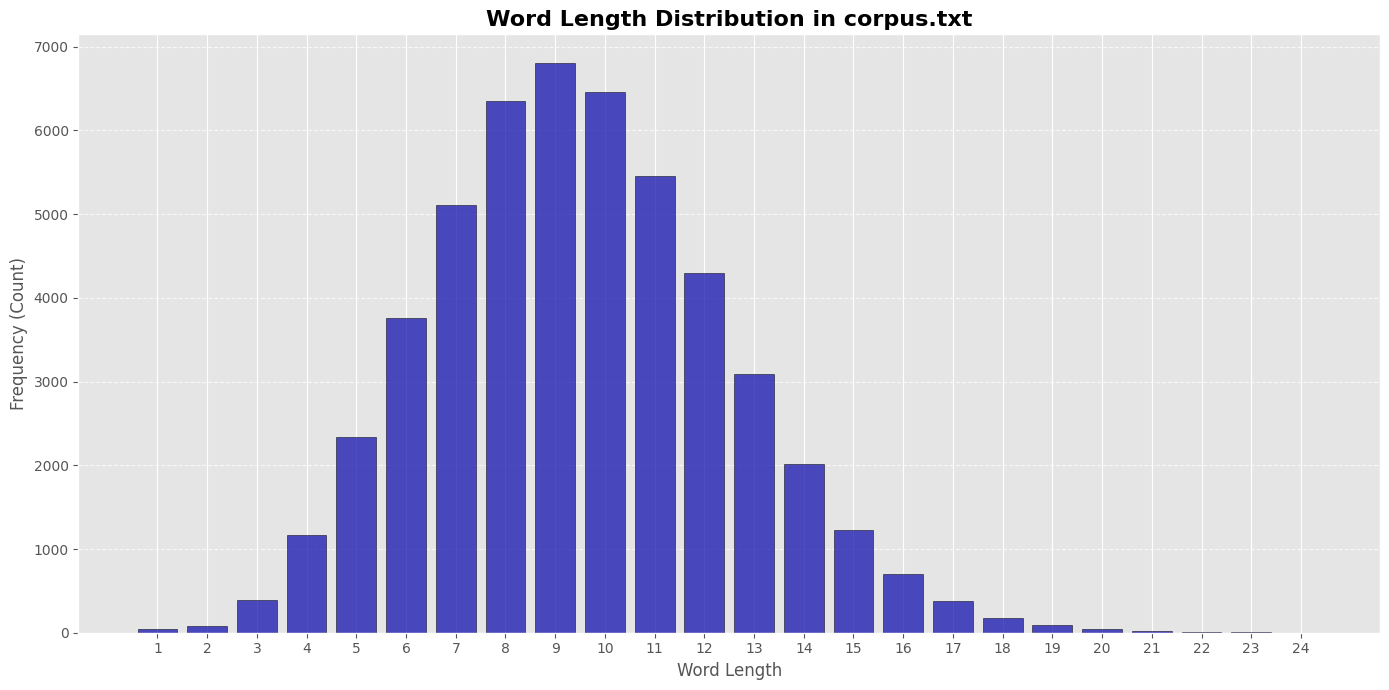

Histogram displayed.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Configuration ---
input_file = 'corpus.txt'
# ---------------------

print(f"Loading words from {input_file}...")

try:
    # Read the file
    with open(input_file, 'r') as f:
        words = f.readlines()

    # Clean up words (remove newlines/whitespace)
    words = [word.strip() for word in words if word.strip()]
    print(f"Loaded {len(words)} words.")

    # Create a DataFrame
    df = pd.DataFrame(words, columns=['word'])

    # Create a 'length' column
    df['length'] = df['word'].str.len()

    # --- Plotting the Histogram ---
    
    print("Generating histogram...")
    
    # Set plot style for better aesthetics
    plt.style.use('ggplot')
    
    # Create the figure and axes
    plt.figure(figsize=(14, 7))
    
    # Determine the number of bins. Since lengths are discrete, we can
    # set bins to cover each integer length.
    min_len = int(df['length'].min())
    max_len = int(df['length'].max())
    
    # We want a bin for each integer, so bins should go from min_len to max_len + 1
    # Example: if max_len is 26, bins will be [1, 2, ..., 27]
    bins = range(min_len, max_len + 2)

    # Plot the histogram
    # align='left' makes the bars correspond to the integer value on the left
    # rwidth=0.8 adds a small gap between bars
    plt.hist(df['length'], bins=bins, align='left', rwidth=0.8, color='#0504aa', alpha=0.7, edgecolor='black')

    # Customize the plot
    plt.title('Word Length Distribution in corpus.txt', fontsize=16, fontweight='bold')
    plt.xlabel('Word Length', fontsize=12)
    plt.ylabel('Frequency (Count)', fontsize=12)
    
    # Set x-ticks to show each integer word length
    plt.xticks(range(min_len, max_len + 1))
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Ensure the layout is clean
    plt.tight_layout()
    
    # Display the plot
    plt.show()
    
    print("Histogram displayed.")

except FileNotFoundError:
    print(f"ERROR: The file '{input_file}' was not found.")
    print("Please make sure 'corpus.txt' is in the same directory.")
except Exception as e:
    print(f"An error occurred: {e}")


In [24]:
import sys
from collections import Counter

def find_rare_words_by_length(filename="corpus.txt", threshold=50):
    """
    Reads a file of words and prints all words that have a
    "rare" length, defined by the threshold.
    """
    try:
        # --- Step 1: Read all words from the file ---
        # We strip whitespace (like newline characters) from each word.
        # We also ignore any blank lines.
        with open(filename, 'r') as f:
            words = [line.strip() for line in f if line.strip()]

        if not words:
            print(f"File '{filename}' is empty or could not be read.")
            return

        print(f"--- Successfully read {len(words)} total words from '{filename}' ---")

        # --- Step 2: Count the frequency of each word length ---
        # A Counter will automatically create a dictionary like:
        # {5: 450, 3: 1200, 10: 22, 1: 3}
        # (Meaning length 5 appeared 450 times, length 10 appeared 22 times, etc.)
        length_counts = Counter(len(word) for word in words)

        print("\n--- Word Length Frequency (All) ---")
        # Sort by length for a cleaner report
        for length, count in sorted(length_counts.items()):
            print(f"Length {length}: {count} instances")

        # --- Step 3: Identify the "rare" lengths ---
        # We use a set for a fast lookup in the next step.
        rare_lengths = {length for length, count in length_counts.items() if count < threshold}

        if not rare_lengths:
            print(f"\nNo rare word lengths found (all lengths appeared {threshold} or more times).")
            return

        print(f"\n--- Rare Lengths Found (less than {threshold} instances) ---")
        print(sorted(list(rare_lengths)))

        # --- Step 4: Filter the original list to get the rare words ---
        rare_words = [word for word in words if len(word) in rare_lengths]

        # --- Step 5: Print the final list of rare words, sorted by length ---
        print(f"\n--- Found {len(rare_words)} Words with Rare Lengths (Sorted by Length) ---")
        # Sort the final list by word length before printing
        for word in sorted(rare_words, key=len):
            print(word)

    except FileNotFoundError:
        print(f"Error: The file '{filename}' was not found.")
        print(f"Please make sure your word list is in the same directory and named correctly.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# --- To run the script from your terminal ---
if __name__ == "__main__":
    # By default, it looks for 'corpus.txt'.
    # You can also pass your filename as an argument in the terminal, e.g.:
    # python find_rare_words.py my_50000_words.txt
    
    file_to_check = 'corpus.txt'
    
    # Find the first argument that doesn't start with '-'
    # This makes the script more robust when run in IDEs (like Jupyter)
    # that pass their own arguments (e.g., --f=...json)
    for arg in sys.argv[1:]:
        if not arg.startswith('-'):
            file_to_check = arg
            break # Found our file, stop looking
            
    find_rare_words_by_length(file_to_check, threshold=50)



--- Successfully read 50000 total words from 'corpus.txt' ---

--- Word Length Frequency (All) ---
Length 1: 46 instances
Length 2: 84 instances
Length 3: 388 instances
Length 4: 1169 instances
Length 5: 2340 instances
Length 6: 3755 instances
Length 7: 5111 instances
Length 8: 6348 instances
Length 9: 6808 instances
Length 10: 6465 instances
Length 11: 5452 instances
Length 12: 4292 instances
Length 13: 3094 instances
Length 14: 2019 instances
Length 15: 1226 instances
Length 16: 698 instances
Length 17: 375 instances
Length 18: 174 instances
Length 19: 88 instances
Length 20: 40 instances
Length 21: 16 instances
Length 22: 8 instances
Length 23: 3 instances
Length 24: 1 instances

--- Rare Lengths Found (less than 50 instances) ---
[1, 20, 21, 22, 23, 24]

--- Found 114 Words with Rare Lengths (Sorted by Length) ---
v
d
b
m
o
i
m
t
r
x
c
q
p
y
k
a
m
w
i
q
d
n
z
u
l
h
d
z
m
v
x
g
e
r
q
v
x
x
c
v
m
w
v
v
b
k
benzofuroquinoxaline
pectinatodenticulate
microcrystallography
interdifferenti


HANGMAN DATALOADER - 60 FEATURE EXTRACTION

[STEP 1] Creating DataFrames from text files...

PROCESSING: corpus.txt
Raw lines read: 50000

✓ Valid words processed: 50000
✗ Skipped (empty/invalid): 0
📊 DataFrame shape: (50000, 60) (rows × columns)

PROCESSING: test.txt
Raw lines read: 2000

✓ Valid words processed: 2000
✗ Skipped (empty/invalid): 0
📊 DataFrame shape: (2000, 60) (rows × columns)

[STEP 2] Sample data from corpus...

📋 First 5 rows (selected columns):
               word  length first_letter last_letter  vowel_count  \
0       suburbanize      11            s           e            5   
1            asmack       6            a           k            2   
2         hypotypic       9            h           c            2   
3  promoderationist      16            p           t            7   
4       consonantly      11            c           y            3   

   unique_letters  letter_diversity  
0               9          0.818182  
1               5          0.833333  


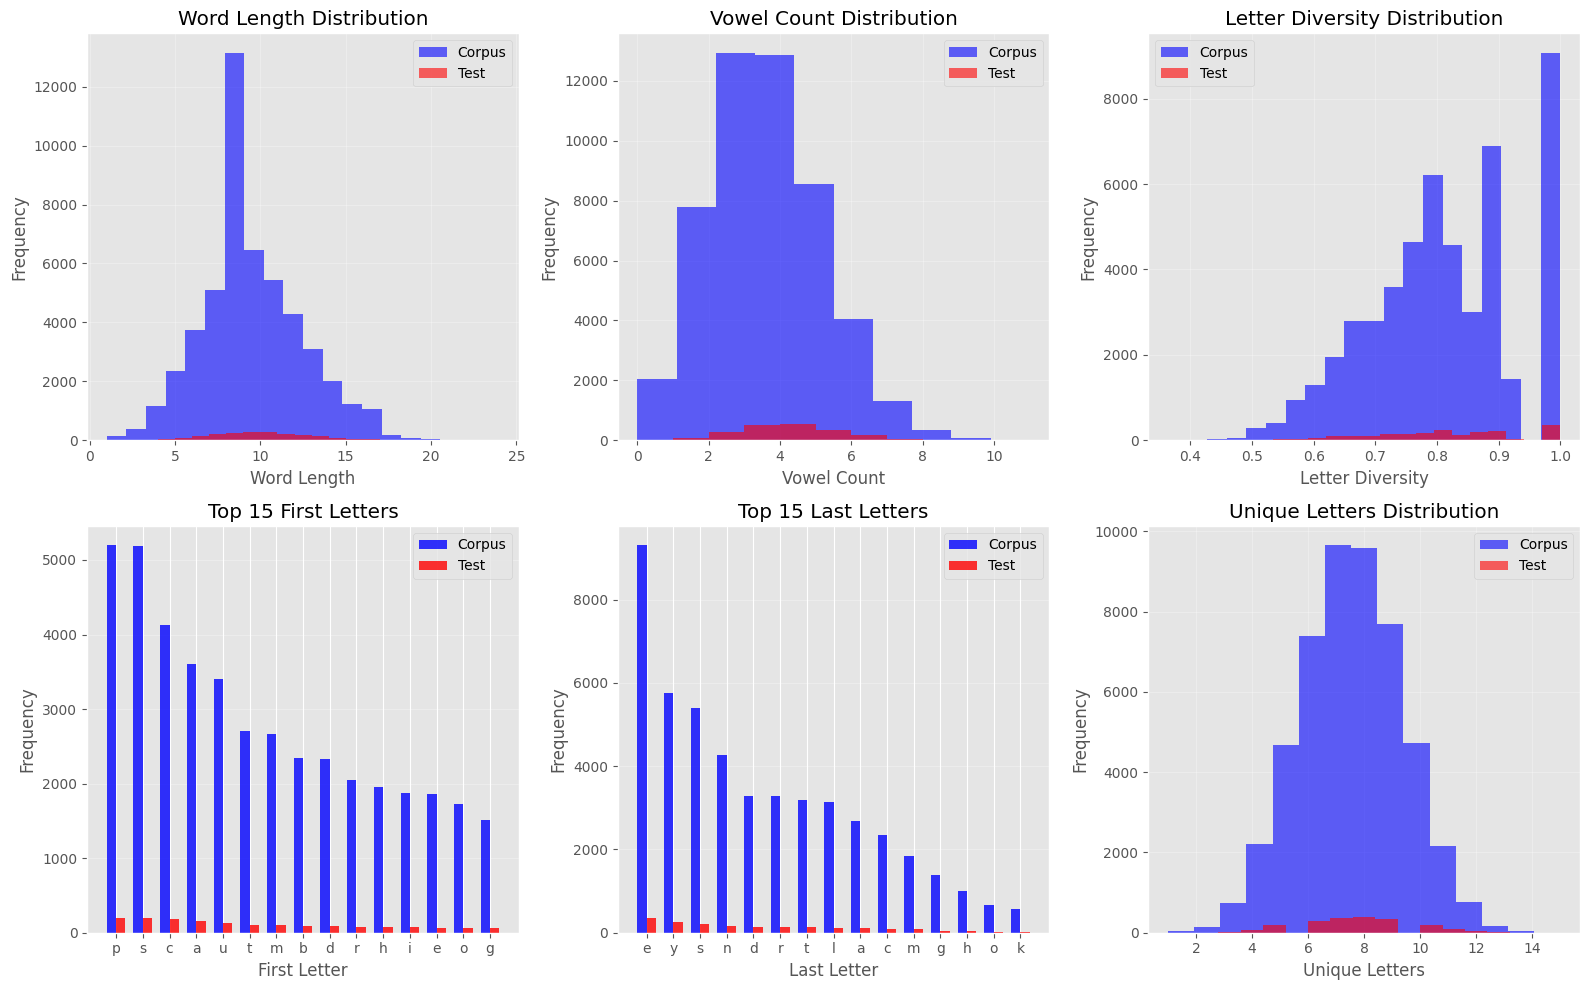


SUMMARY

📊 Corpus Dataset:
  - Total words: 50,000
  - Unique words: 49,398
  - Avg length: 9.50
  - Length range: 1-24

📊 Test Dataset:
  - Total words: 2,000
  - Unique words: 2,000
  - Avg length: 9.64
  - Length range: 2-22

✅ DATALOADER CREATION COMPLETE!

📁 Generated Files:
  1. corpus_features.csv - Corpus with 60 features
  2. test_features.csv - Test with 60 features
  3. dataloader_feature_analysis.png - Visualization

💡 Usage Example:

    # Load the DataLoaders
    corpus_loader = HangmanDataLoader(corpus_df, batch_size=64)

    # Iterate through batches
    for batch in corpus_loader:
        words = batch['word']
        lengths = batch['length']
        positions = batch[[f'pos_{i}' for i in range(25)]]
        # ... train your HMM here
    



In [27]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================
# FEATURE EXTRACTION FUNCTION
# ============================================

def create_word_features(word):
    """
    Extract all 60 features for a single word
    Returns: dictionary with all features
    """
    word = word.lower().strip()
   
    if not word:
        return None
   
    # 1. Basic Metadata (2 features)
    features = {
        'word': word,
        'length': len(word)
    }
   
    # 2. Boundary Features (2 features)
    features['first_letter'] = word[0]
    features['last_letter'] = word[-1]
   
    # 3. Vowel/Consonant Statistics (3 features)
    vowels = set('aeiou')
    vowel_count = sum(1 for c in word if c in vowels)
    consonant_count = sum(1 for c in word if c.isalpha() and c not in vowels)
   
    features['has_vowel'] = 1 if vowel_count > 0 else 0
    features['vowel_count'] = vowel_count
    features['consonant_count'] = consonant_count
   
    # 4. Letter Diversity Features (2 features)
    unique_letters = len(set(word))
    features['unique_letters'] = unique_letters
    features['letter_diversity'] = unique_letters / len(word) if len(word) > 0 else 0
   
    # 5. Positional Features (25 features: pos_0 to pos_24)
    max_positions = 25
    for pos in range(max_positions):
        if pos < len(word):
            features[f'pos_{pos}'] = word[pos]
        else:
            features[f'pos_{pos}'] = None
   
    # 6. Letter Frequency Features (26 features: freq_a to freq_z)
    letter_freq = Counter(word)
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features[f'freq_{letter}'] = letter_freq.get(letter, 0)
   
    return features


# ============================================
# DATAFRAME CREATOR
# ============================================

def create_dataframe_from_file(filename):
    """
    Load text file and create DataFrame with all 60 features
   
    Args:
        filename: path to .txt file (corpus.txt or test.txt)
   
    Returns:
        pandas DataFrame with 60 columns
    """
    print(f"\n{'='*60}")
    print(f"PROCESSING: {filename}")
    print(f"{'='*60}")
   
    # Load words
    with open(filename, 'r', encoding='utf-8') as f:
        words = [line.strip() for line in f if line.strip()]
   
    print(f"Raw lines read: {len(words)}")
   
    # Extract features for each word
    features_list = []
    skipped = 0
   
    for word in words:
        word_features = create_word_features(word)
        if word_features:
            features_list.append(word_features)
        else:
            skipped += 1
   
    # Create DataFrame
    df = pd.DataFrame(features_list)
   
    print(f"\n✓ Valid words processed: {len(df)}")
    print(f"✗ Skipped (empty/invalid): {skipped}")
    print(f"📊 DataFrame shape: {df.shape} (rows × columns)")
   
    return df


# ============================================
# DATALOADER CLASS
# ============================================

class HangmanDataLoader:
    """
    DataLoader for Hangman datasets
    Provides batching and iteration over word features
    """
   
    def __init__(self, dataframe, batch_size=32, shuffle=True):
        """
        Initialize DataLoader
       
        Args:
            dataframe: pandas DataFrame with word features
            batch_size: number of samples per batch
            shuffle: whether to shuffle data
        """
        self.df = dataframe.reset_index(drop=True)
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.n_samples = len(self.df)
        self.n_batches = int(np.ceil(self.n_samples / batch_size))
       
        print(f"\n✓ DataLoader initialized:")
        print(f"  - Total samples: {self.n_samples}")
        print(f"  - Batch size: {self.batch_size}")
        print(f"  - Number of batches: {self.n_batches}")
        print(f"  - Shuffle: {self.shuffle}")
   
    def __len__(self):
        """Return number of batches"""
        return self.n_batches
   
    def __iter__(self):
        """Iterate over batches"""
        if self.shuffle:
            indices = np.random.permutation(self.n_samples)
        else:
            indices = np.arange(self.n_samples)
       
        for i in range(0, self.n_samples, self.batch_size):
            batch_indices = indices[i:i + self.batch_size]
            batch = self.df.iloc[batch_indices]
            yield batch
   
    def __getitem__(self, idx):
        """Get batch by index"""
        start = idx * self.batch_size
        end = min(start + self.batch_size, self.n_samples)
        return self.df.iloc[start:end]
   
    def get_batch(self, batch_idx):
        """Get specific batch"""
        return self.__getitem__(batch_idx)
   
    def get_all_data(self):
        """Return full DataFrame"""
        return self.df


# ============================================
# VISUALIZATION & ANALYSIS
# ============================================

def analyze_dataframe(df, dataset_name="Dataset"):
    """Analyze and visualize DataFrame statistics"""
    print(f"\n{'='*60}")
    print(f"ANALYZING: {dataset_name}")
    print(f"{'='*60}")
   
    # Basic stats
    print(f"\n📊 Dataset Statistics:")
    print(f"  Total words: {len(df)}")
    print(f"  Unique words: {df['word'].nunique()}")
    print(f"  Average length: {df['length'].mean():.2f}")
    print(f"  Min length: {df['length'].min()}")
    print(f"  Max length: {df['length'].max()}")
    print(f"  Average vowel count: {df['vowel_count'].mean():.2f}")
    print(f"  Average unique letters: {df['unique_letters'].mean():.2f}")
    print(f"  Average letter diversity: {df['letter_diversity'].mean():.3f}")
   
    # Top features
    print(f"\n🔤 Most common first letters:")
    print(df['first_letter'].value_counts().head(5))
   
    print(f"\n🔤 Most common last letters:")
    print(df['last_letter'].value_counts().head(5))
   
    print(f"\n📏 Length distribution:")
    print(df['length'].value_counts().sort_index().head(10))
   
    return {
        'total_words': len(df),
        'unique_words': df['word'].nunique(),
        'avg_length': df['length'].mean(),
        'min_length': df['length'].min(),
        'max_length': df['length'].max()
    }


def plot_feature_distributions(corpus_df, test_df):
    """Plot comparison of features between corpus and test"""
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
   
    # Plot 1: Length distribution
    axes[0, 0].hist(corpus_df['length'], bins=20, alpha=0.6, label='Corpus', color='blue')
    axes[0, 0].hist(test_df['length'], bins=20, alpha=0.6, label='Test', color='red')
    axes[0, 0].set_xlabel('Word Length')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Word Length Distribution')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
   
    # Plot 2: Vowel count
    axes[0, 1].hist(corpus_df['vowel_count'], bins=10, alpha=0.6, label='Corpus', color='blue')
    axes[0, 1].hist(test_df['vowel_count'], bins=10, alpha=0.6, label='Test', color='red')
    axes[0, 1].set_xlabel('Vowel Count')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('Vowel Count Distribution')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
   
    # Plot 3: Letter diversity
    axes[0, 2].hist(corpus_df['letter_diversity'], bins=20, alpha=0.6, label='Corpus', color='blue')
    axes[0, 2].hist(test_df['letter_diversity'], bins=20, alpha=0.6, label='Test', color='red')
    axes[0, 2].set_xlabel('Letter Diversity')
    axes[0, 2].set_ylabel('Frequency')
    axes[0, 2].set_title('Letter Diversity Distribution')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)
   
    # Plot 4: First letter frequency (top 15)
    first_corpus = corpus_df['first_letter'].value_counts().head(15)
    first_test = test_df['first_letter'].value_counts().head(15)
    x = np.arange(len(first_corpus))
    width = 0.35
    axes[1, 0].bar(x - width/2, first_corpus.values, width, label='Corpus', alpha=0.8, color='blue')
    axes[1, 0].bar(x + width/2, first_test.values, width, label='Test', alpha=0.8, color='red')
    axes[1, 0].set_xlabel('First Letter')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Top 15 First Letters')
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels(first_corpus.index)
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3, axis='y')
   
    # Plot 5: Last letter frequency (top 15)
    last_corpus = corpus_df['last_letter'].value_counts().head(15)
    last_test = test_df['last_letter'].value_counts().head(15)
    x = np.arange(len(last_corpus))
    axes[1, 1].bar(x - width/2, last_corpus.values, width, label='Corpus', alpha=0.8, color='blue')
    axes[1, 1].bar(x + width/2, last_test.values, width, label='Test', alpha=0.8, color='red')
    axes[1, 1].set_xlabel('Last Letter')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_title('Top 15 Last Letters')
    axes[1, 1].set_xticks(x)
    axes[1, 1].set_xticklabels(last_corpus.index)
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3, axis='y')
   
    # Plot 6: Unique letters
    axes[1, 2].hist(corpus_df['unique_letters'], bins=15, alpha=0.6, label='Corpus', color='blue')
    axes[1, 2].hist(test_df['unique_letters'], bins=15, alpha=0.6, label='Test', color='red')
    axes[1, 2].set_xlabel('Unique Letters')
    axes[1, 2].set_ylabel('Frequency')
    axes[1, 2].set_title('Unique Letters Distribution')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)
   
    plt.tight_layout()
    plt.savefig('dataloader_feature_analysis.png', dpi=150, bbox_inches='tight')
    print("\n✓ Saved: dataloader_feature_analysis.png")
    plt.show()


# ============================================
# MAIN EXECUTION
# ============================================

if __name__ == "__main__":
    print("\n" + "="*60)
    print("HANGMAN DATALOADER - 60 FEATURE EXTRACTION")
    print("="*60)
   
    # ========================================
    # STEP 1: Create DataFrames
    # ========================================
    print("\n[STEP 1] Creating DataFrames from text files...")
   
    corpus_df = create_dataframe_from_file('corpus.txt')
    test_df = create_dataframe_from_file('test.txt')
   
    # ========================================
    # STEP 2: Display Sample Data
    # ========================================
    print("\n[STEP 2] Sample data from corpus...")
    print("\n📋 First 5 rows (selected columns):")
    sample_cols = ['word', 'length', 'first_letter', 'last_letter',
                   'vowel_count', 'unique_letters', 'letter_diversity']
    print(corpus_df[sample_cols].head())
   
    print("\n📋 Positional features sample (first 3 words):")
    pos_cols = ['word'] + [f'pos_{i}' for i in range(10)]
    print(corpus_df[pos_cols].head(3))
   
    print("\n📋 Letter frequency features sample (first 3 words):")
    freq_cols = ['word'] + [f'freq_{l}' for l in 'aeiou']
    print(corpus_df[freq_cols].head(3))
   
    # ========================================
    # STEP 3: Verify Feature Count
    # ========================================
    print("\n[STEP 3] Verifying feature count...")
    print(f"\n✓ Corpus DataFrame columns: {len(corpus_df.columns)}")
    print(f"✓ Test DataFrame columns: {len(test_df.columns)}")
   
    print("\n📊 Feature breakdown:")
    print(f"  - Basic metadata: 2 (word, length)")
    print(f"  - Boundary features: 2 (first_letter, last_letter)")
    print(f"  - Vowel/consonant: 3 (has_vowel, vowel_count, consonant_count)")
    print(f"  - Diversity: 2 (unique_letters, letter_diversity)")
    print(f"  - Positional: 25 (pos_0 to pos_24)")
    print(f"  - Letter frequency: 26 (freq_a to freq_z)")
    print(f"  - TOTAL: 60 features")
   
    # ========================================
    # STEP 4: Save DataFrames
    # ========================================
    print("\n[STEP 4] Saving DataFrames to CSV...")
    corpus_df.to_csv('corpus_features.csv', index=False)
    test_df.to_csv('test_features.csv', index=False)
    print("✓ Saved: corpus_features.csv")
    print("✓ Saved: test_features.csv")
   
    # ========================================
    # STEP 5: Create DataLoaders
    # ========================================
    print("\n[STEP 5] Creating DataLoaders...")
   
    corpus_loader = HangmanDataLoader(corpus_df, batch_size=64, shuffle=True)
    test_loader = HangmanDataLoader(test_df, batch_size=32, shuffle=False)
   
    print("\n📦 Corpus DataLoader:")
    print(f"  - Batches: {len(corpus_loader)}")
    print(f"  - Batch size: 64")
   
    print("\n📦 Test DataLoader:")
    print(f"  - Batches: {len(test_loader)}")
    print(f"  - Batch size: 32")
   
    # ========================================
    # STEP 6: Test DataLoader Iteration
    # ========================================
    print("\n[STEP 6] Testing DataLoader iteration...")
   
    print("\n🔄 Getting first batch from corpus loader:")
    first_batch = next(iter(corpus_loader))
    print(f"Batch shape: {first_batch.shape}")
    print("\nFirst 3 words in batch:")
    print(first_batch[['word', 'length', 'vowel_count']].head(3))
   
    print("\n🔄 Iterating through first 3 batches:")
    for i, batch in enumerate(corpus_loader):
        if i >= 3:
            break
        print(f"  Batch {i+1}: {len(batch)} samples, "
              f"avg length: {batch['length'].mean():.2f}")
   
    # ========================================
    # STEP 7: Analyze DataFrames
    # ========================================
    print("\n[STEP 7] Analyzing DataFrames...")
   
    corpus_stats = analyze_dataframe(corpus_df, "CORPUS")
    test_stats = analyze_dataframe(test_df, "TEST")
   
    # ========================================
    # STEP 8: Visualizations
    # ========================================
    print("\n[STEP 8] Creating visualizations...")
    plot_feature_distributions(corpus_df, test_df)
   
    # ========================================
    # STEP 9: Summary Statistics
    # ========================================
    print("\n" + "="*60)
    print("SUMMARY")
    print("="*60)
   
    print("\n📊 Corpus Dataset:")
    print(f"  - Total words: {corpus_stats['total_words']:,}")
    print(f"  - Unique words: {corpus_stats['unique_words']:,}")
    print(f"  - Avg length: {corpus_stats['avg_length']:.2f}")
    print(f"  - Length range: {corpus_stats['min_length']}-{corpus_stats['max_length']}")
   
    print("\n📊 Test Dataset:")
    print(f"  - Total words: {test_stats['total_words']:,}")
    print(f"  - Unique words: {test_stats['unique_words']:,}")
    print(f"  - Avg length: {test_stats['avg_length']:.2f}")
    print(f"  - Length range: {test_stats['min_length']}-{test_stats['max_length']}")
   
    print("\n✅ DATALOADER CREATION COMPLETE!")
    print("\n📁 Generated Files:")
    print("  1. corpus_features.csv - Corpus with 60 features")
    print("  2. test_features.csv - Test with 60 features")
    print("  3. dataloader_feature_analysis.png - Visualization")
   
    print("\n💡 Usage Example:")
    print("""
    # Load the DataLoaders
    corpus_loader = HangmanDataLoader(corpus_df, batch_size=64)
   
    # Iterate through batches
    for batch in corpus_loader:
        words = batch['word']
        lengths = batch['length']
        positions = batch[[f'pos_{i}' for i in range(25)]]
        # ... train your HMM here
    """)
   
    print("\n" + "="*60)